In [22]:
### Function Imports
from BetaFunctions import import_fx_data, daily_returns, get_beta, beta_backtest, plot_hedged_returns, performance_metrics


In [23]:
### Call Function to Load in Rate Data
all_forex_pairs = [
        'EURUSD=X', 'GBPUSD=X', 'USDJPY=X', 'USDCHF=X', 'AUDUSD=X', 'NZDUSD=X',
        'USDCAD=X', 'EURGBP=X', 'EURJPY=X', 'EURCHF=X', 'EURAUD=X', 'EURNZD=X',
        'EURCAD=X', 'GBPAUD=X', 'GBPJPY=X', 'GBPCHF=X', 'AUDJPY=X', 'AUDCHF=X',
        'AUDNZD=X', 'NZDJPY=X', 'NZDCHF=X', 'CADJPY=X', 'CADCHF=X', 'CHFJPY=X'
    ]
start_date = '2023-07-01'
end_date = '2024-07-01'
forex_data = import_fx_data(all_forex_pairs, start_date, end_date)
forex_data.tail()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

,Date,EURUSD=X,GBPUSD=X,USDJPY=X,USDCHF=X,AUDUSD=X,NZDUSD=X,USDCAD=X,EURGBP=X,EURJPY=X,...,GBPJPY=X,GBPCHF=X,AUDJPY=X,AUDCHF=X,AUDNZD=X,NZDJPY=X,NZDCHF=X,CADJPY=X,CADCHF=X,CHFJPY=X
255,2024-06-24,1.068776,1.263903,159.860992,0.89410,0.663500,0.611120,1.37013,0.84567,170.850006,...,202.018997,1.13010,106.050003,0.593010,1.08556,97.679001,0.54647,116.667000,0.65270,178.683334
256,2024-06-25,1.073272,1.268343,159.686005,0.89319,0.665460,0.612051,1.36579,0.84619,171.375000,...,202.513000,1.13274,106.257004,0.594392,1.08727,97.722000,0.54658,116.917000,0.65393,178.755997
257,2024-06-26,1.070962,1.268400,159.686005,0.89520,0.664480,0.611909,1.36611,0.84429,171.009995,...,202.539993,1.13554,106.103996,0.594949,1.08598,97.648003,0.54753,116.887001,0.65529,178.347000
258,2024-06-27,1.068011,1.262180,160.621002,0.89670,0.664478,0.608028,1.37045,0.84613,171.535004,...,202.716003,1.13210,106.719002,0.595918,1.09290,97.633003,0.54510,117.171997,0.65410,179.044006
259,2024-06-28,1.070847,1.264574,160.686996,0.89852,0.665060,0.608469,1.36993,0.84678,172.065002,...,203.188995,1.13616,106.862999,0.597560,1.09300,97.760002,0.54662,117.293999,0.65585,178.775589


In [24]:
### Call Function to Calculate Daily Returns and Build Results df
daily_rets = daily_returns(forex_data)
print(daily_rets.head())


        Date  EURUSD=X  GBPUSD=X  USDJPY=X  USDCHF=X  AUDUSD=X  NZDUSD=X  \
0 2023-07-04  0.000513 -0.000025  0.001288  0.000894  0.002369  0.003884   
1 2023-07-05 -0.002580  0.001946 -0.001231  0.000938  0.002788  0.006836   
2 2023-07-06 -0.002606 -0.001029  0.000575  0.002097 -0.005349 -0.003404   
3 2023-07-07  0.003137  0.003007 -0.003723 -0.003606 -0.004282 -0.002182   
4 2023-07-10  0.007262  0.007549 -0.012101 -0.007126  0.009049  0.006876   

   USDCAD=X  EURGBP=X  EURJPY=X  ...  GBPJPY=X  GBPCHF=X  AUDJPY=X  AUDCHF=X  \
0 -0.000151  0.000547  0.001791  ...  0.001162  0.000704  0.003703  0.003222   
1 -0.001849 -0.005060 -0.004018  ...  0.000654  0.002718  0.001555  0.003810   
2  0.004719 -0.001146 -0.001890  ... -0.000436  0.001184 -0.005070 -0.003812   
3  0.005984  0.000234 -0.000529  ... -0.000648 -0.000675 -0.007707 -0.007560   
4 -0.006539 -0.000234 -0.005167  ... -0.004591  0.000491 -0.003186  0.001904   

   AUDNZD=X  NZDJPY=X  NZDCHF=X  CADJPY=X  CADCHF=X  CHFJPY=X 

In [25]:
### Function Call to Compute and Store All Results
'''
Beta is a measure of the sensitivity or volatility of an asset's returns in relation 
to the returns of a benchmark or market index. In the context of foreign exchange (FX) 
trading, beta represents how much the returns of one currency pair move in relation to 
the returns of another currency pair.
Beta = 1: The returns of the currency pair move in tandem with the benchmark. If the 
          benchmark's return increases by 1%, the currency pair's return also increases 
          by 1%, on average.

Beta > 1: The currency pair is more volatile than the benchmark. For example, if beta 
          is 1.5, then the currency pair's return is expected to increase by 1.5% for 
          every 1% increase in the benchmark's return, on average.

Beta < 1: The currency pair is less volatile than the benchmark. For example, if beta is 
          0.5, then the currency pair's return is expected to increase by 0.5% for every 
          1% increase in the benchmark's return, on average.

Beta = 0: There is no relationship between the currency pair's returns and the benchmark's returns.

Negative Beta: The currency pair moves in the opposite direction of the benchmark. For 
               example, if beta is -1, then the currency pair's return is expected to decrease
               by 1% for every 1% increase in the benchmark's return, on average.
'''
# Define base pairs and benchmark pairs and long position
long_pos = 1000
base_pairs = ['USDJPY=X']
benchmark_pair = 'EURUSD=X'

# Iterate over the Base Pairs List to Compute Each LS Pair
for base_pair in base_pairs:
    beta = get_beta(daily_rets, base_pair, benchmark_pair)
    print('The computed beta is: ', round(beta, 5))
    short_pos, hedged_cumulative_rets, unhedged_cumulative_rets = beta_backtest(long_pos, base_pair, benchmark_pair, daily_rets, beta)
    metrics = performance_metrics(long_pos, hedged_cumulative_rets, unhedged_cumulative_rets, daily_rets, base_pair, benchmark_pair)

print(metrics)

The computed beta is:  -0.59291

Performance Metrics for Pair: USDJPY=X (Base) and EURUSD=X (Benchmark)
Metric                                  Hedged        Unhedged
Total Returns                         102.7893        112.8063
Annualized Returns                     90.5508         99.1369
Mean Return                          1028.3563       1032.5118
Standard Deviation                     30.7636         34.2198
Sharpe Ratio                          530.6490        478.9807

The Sharpe ratio measures the risk-adjusted return of an investment.
In this instance, the hedged strategy has a Sharpe ratio of 530.6490,
which means for every unit of risk, the hedged portfolio is generating 530.6490 units of return above the risk-free rate.
The unhedged strategy has a Sharpe ratio of 478.9807,
indicating that for every unit of risk, the unhedged portfolio is generating 478.9807 units of return above the risk-free rate.
A higher Sharpe ratio typically indicates a more favorable risk-adjusted r

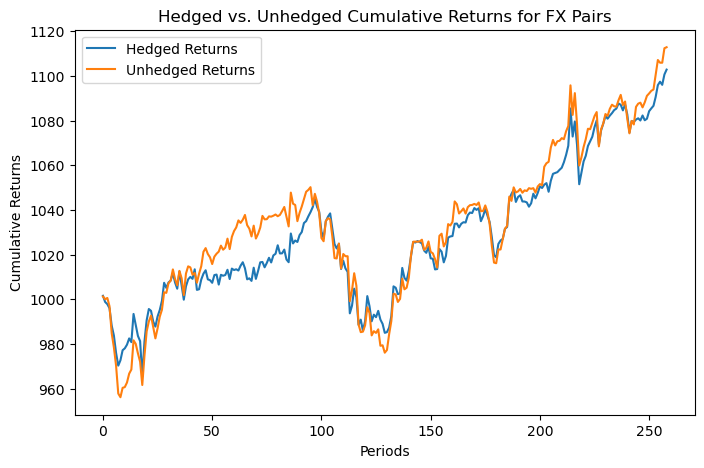

In [26]:
### Plot Results
plot_hedged_returns(hedged_cumulative_rets, unhedged_cumulative_rets)